In [25]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [26]:
import sys
print(sys.executable)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\python.exe


In [27]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [28]:
#tensorflow / pytorch 
#son de las bibliotecas más usadas para el Depp Learning

In [1]:
import pandas as pd
datos = pd.read_csv("celsius.csv")

In [3]:
datos.head()

,celsius,fahrenheit
0,-40.0,-40.0
1,-10.0,14.0
2,0.0,32.0
3,8.0,46.4
4,22.0,71.6


In [4]:
datos["celsius"]
#este es un objeto pandas

0     -40.0
1     -10.0
2       0.0
3       8.0
4      22.0
5      10.0
6     100.0
7      30.0
8      70.0
9       3.5
10     38.0
Name: celsius, dtype: float64

In [5]:
datos["celsius"].values
#aquí, me devuelve un arreglo que es lo que se usará 

array([-40. , -10. ,   0. ,   8. ,  22. ,  10. , 100. ,  30. ,  70. ,
         3.5,  38. ])

In [6]:
#aquí se hace de una vez el entrenamiento
x = datos["celsius"].values
y= datos["fahrenheit"].values


In [7]:
#programación de la red deuronal
import tensorflow as tf
modelo =tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),# la entrada, los celsius: 1 solo dato
    tf.keras.layers.Dense(units=1)#esta es la salida, también es un dato: los grados fahrenheit
])
#keras sirve para hacer redes neuronales sencillas
#dentro de loa parentesis se van a porner todas las capas que tendrá la red neuronal
#aqui se define cuantas entradas se quieren y cuantas neuronas seran
# en tf.keras.layers.Input() dentro del parentesis se especifica cual es la entrada es decir el dato que ingresa
#dense es el tipo, es decir aquí se especifica cuantas neuronas se quieren
#

In [8]:
#se realiza la compilación o el uso del modelo
modelo.compile(
    optimizer= tf.keras.optimizers.Adam(.1),
    loss="mean_squared_error"
    
)
#optimizador adam sirve para que el modela sepa que proceso debe seguir durante el aprendizaje
#dentro de los parametros de adam, se ingresa la tasa de aprendizaje
#perdida
#estos datos son importantes ya que existen muchas formas en las cuales se puede hacer el entrenamiento  


In [9]:
entrenamiento = modelo.fit(x,y, epochs=1000)
# se entrena el modelo ingresando las variables y en epochs se pone cuantas vueltas se le va a dar al set de datos
#es decir cuantas veces va a recorrer lso datos del archivo
#durante cada epoca el modelo va amedir como le fue y se optimizará con el optimizador
#volverá a dar otra vuelta más hasta llegar a 1000 y tratará de llegar al mejor resultado
#

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - loss: 8435.8506
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 7701.3003
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7004.3472
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6345.5762
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5725.4688
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5144.3662
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4602.4692
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4099.8276
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3636.3132
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3211.6172
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2825.2334
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2476.4517
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2164.3486
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1887.7823
Epoch 15/1000
1/1 ━━━━━━━━━━

In [10]:
#aqui nos dice en que epoca va y dice la perdida que está midiendo, es decir donde esta tratando de ajustarse 
#cada vez le va mejor
#ahora una gráfica para ver como fue bajando la perdida atravez del entrenamiento 

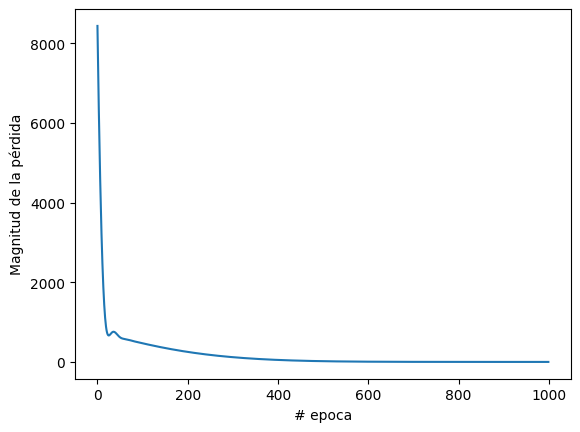

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("# epoca")#en el eje x que muestre la epoca 
plt.ylabel("Magnitud de la pérdida")
plt.plot(entrenamiento.history["loss"])#aqui es lo que enverdad se va a imprimir 
#con histori se obriene el historico que realizó para entrenarse

In [15]:
#ya con esto se puede realizar una predicción
import numpy as np
c = 1230
arreglo = np.array([c]).reshape(-1, 1)
prediccion = modelo.predict(arreglo)
print(prediccion)
print(f"Predicción {c} celsius son {prediccion[0][0]} fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[2247.9456]]
Predicción 1230 celsius son 2247.945556640625 fahrenheit


In [16]:
#para ver las capas
modelo.layers[0] #aqui solo tiene una capa de neuronas


<Dense name=dense, built=True>

In [18]:
print(modelo.layers[0].get_weights())
#el calculo real para convertir de celcius a farenheith es 


[array([[1.8016973]], dtype=float32), array([31.857935], dtype=float32)]


In [ ]:
"""
(C*1.8) +32
como el modelo llego a 1.8 y a 31 para las variables o parametros, eso es gracias a algo 
llamado back propagation o propagación hacia atras

"""